In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [267]:
#dataset link = "https://www.kaggle.com/datasets/yasserh/titanic-dataset"
df = pd.read_csv('titanic.csv')

In [268]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [270]:
df.shape

(891, 12)

In [271]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [272]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The features 'PassengerId' and 'Name' because of no use in training the model so we can drop it.

In [273]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [274]:
df['Survived'].unique().tolist()

[0, 1]

In [275]:
print(f"Number of unique values in 'Ticket': {df['Ticket'].nunique()}")

Number of unique values in 'Ticket': 681


In [276]:
# Since there are huge number of unique categories in comparision to the total observations, so we need to drop the feature 'Ticket' as not dropping it may lead to overfitting
df.drop('Ticket', axis=1, inplace=True)
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

Visualising the data

<Axes: xlabel='Sex', ylabel='count'>

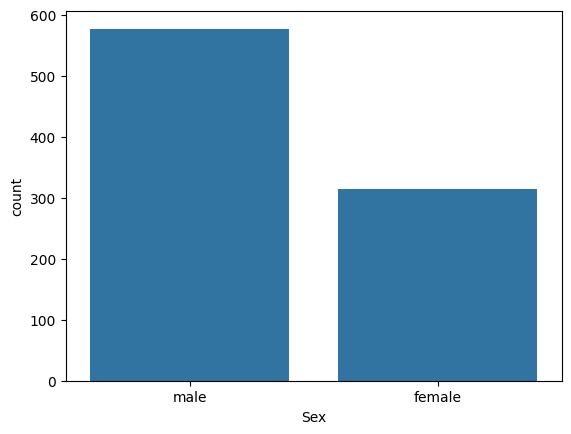

In [277]:
#Countplot for 'Sex'
sns.countplot(x='Sex', data=df)

DATA VISUALISATION

<Axes: >

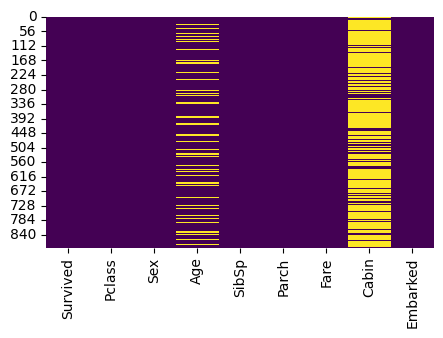

In [278]:
# Visualising the missing values
plt.figure(figsize=(5, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#Observation: As we can see from the below graph that there are a lot of missing values in Cabin and then also in Age.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Survived'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Sex'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'SibSp'),
  Text(5, 0, 'Parch'),
  Text(6, 0, 'Fare'),
  Text(7, 0, 'Cabin'),
  Text(8, 0, 'Embarked')])

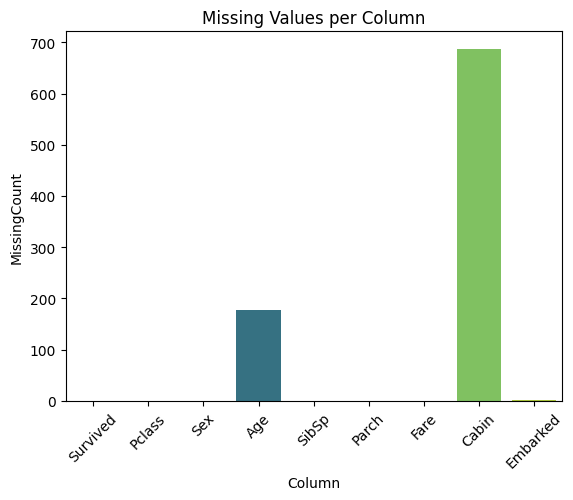

In [279]:
missing_counts = df.isna().sum().reset_index()
missing_counts.columns = ['Column', 'MissingCount']

sns.barplot(x='Column', y='MissingCount', data=missing_counts, palette='viridis')
plt.title("Missing Values per Column")
plt.xticks(rotation=45)

In [280]:
#Exploring 'plotly' library for interactive plots
import plotly.express as px
missing_count = df.isnull().sum()
fig = px.bar(x=missing_count.index, y=missing_count.values, labels={'x': 'Features', 'y': 'Missing Count'},
             title='Missing Values per Feature')
fig.show()

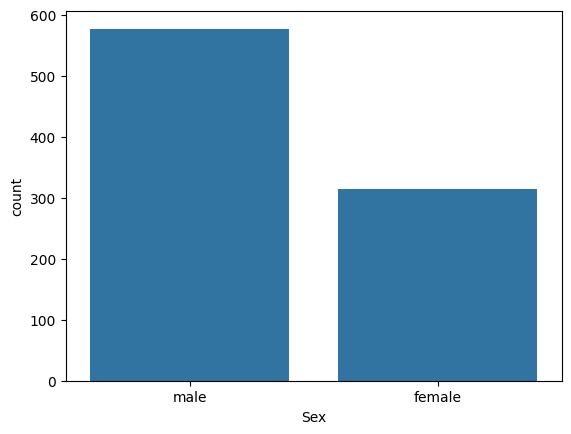

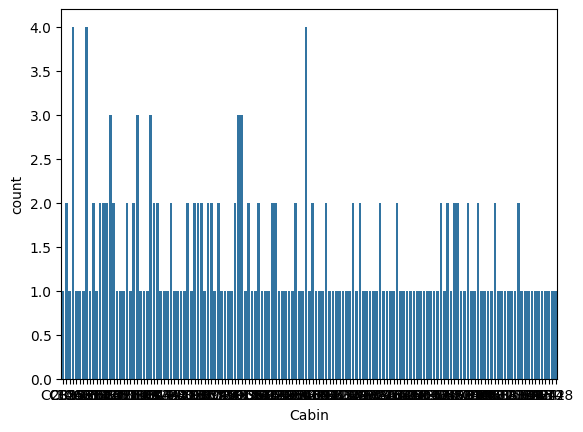

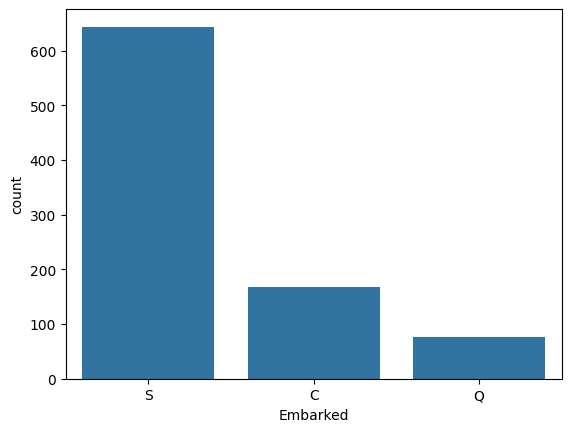

In [281]:
# Analyzing features individually - univariate analysis
categorical_col = df.select_dtypes(include=['object'])
for col in categorical_col.columns:
  sns.countplot(x=col, data=df)
  plt.show()

<Axes: ylabel='count'>

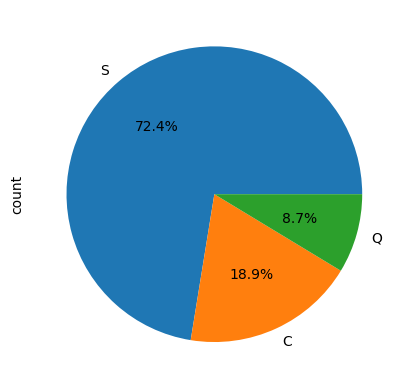

In [282]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

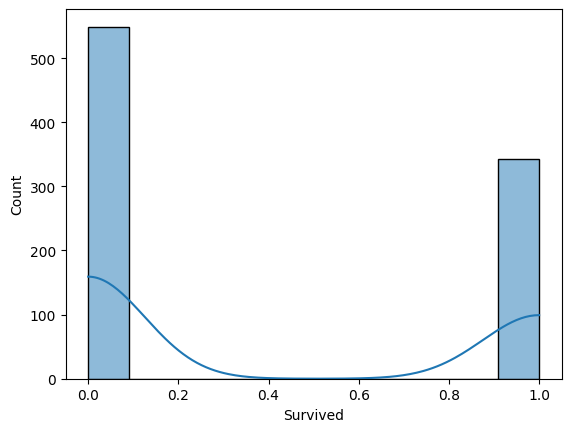

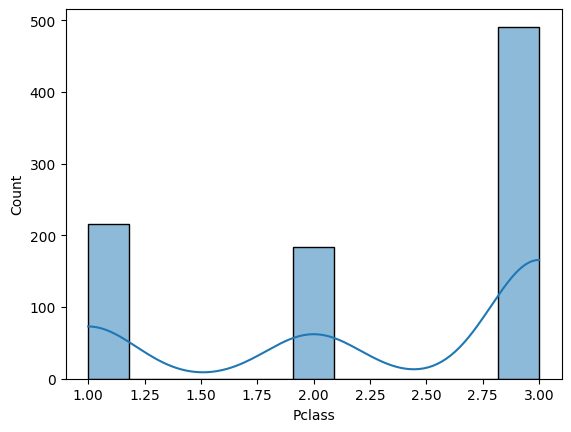

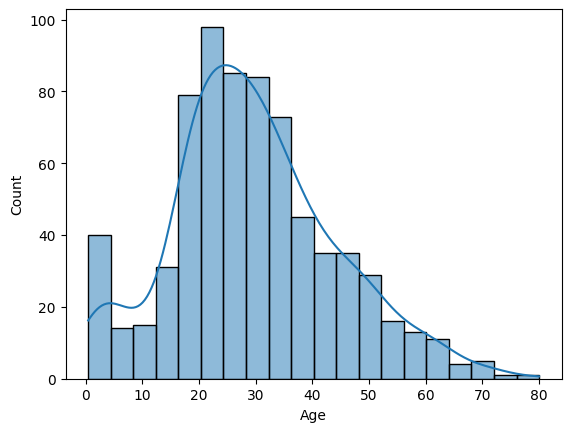

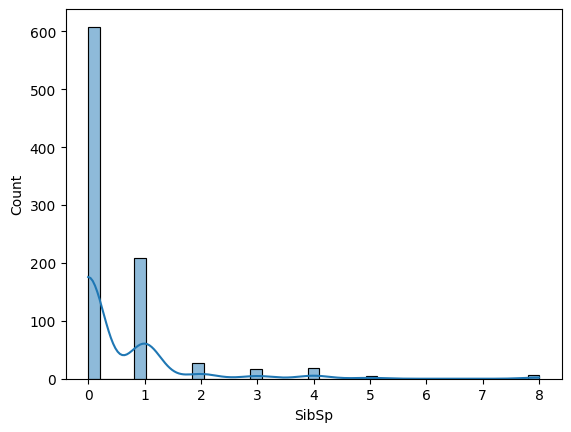

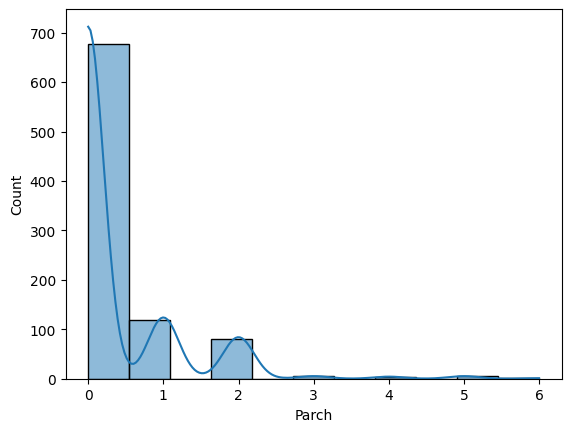

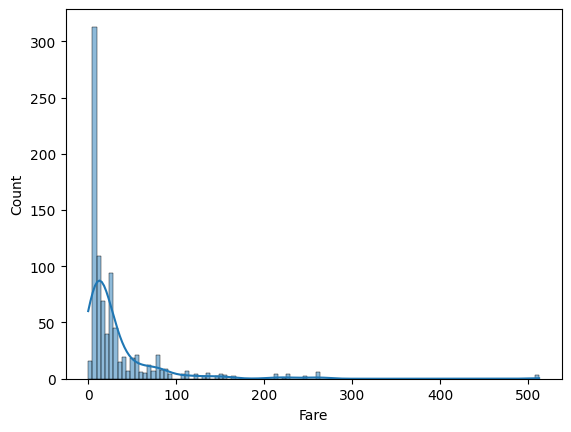

In [283]:
numeric_col = df.select_dtypes(exclude=['object'])

for col in numeric_col.columns:
  sns.histplot(df[col], kde=True)
  plt.show()
# Observation: Most of the features are right skewed

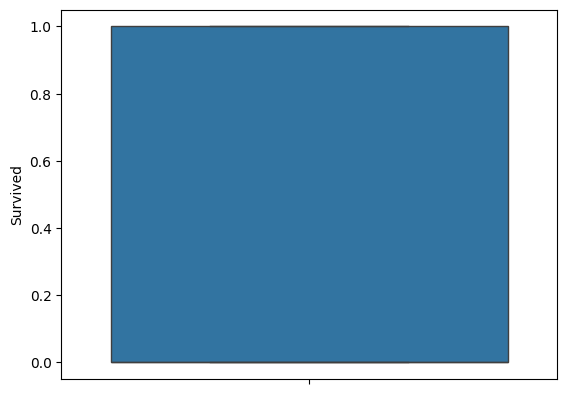

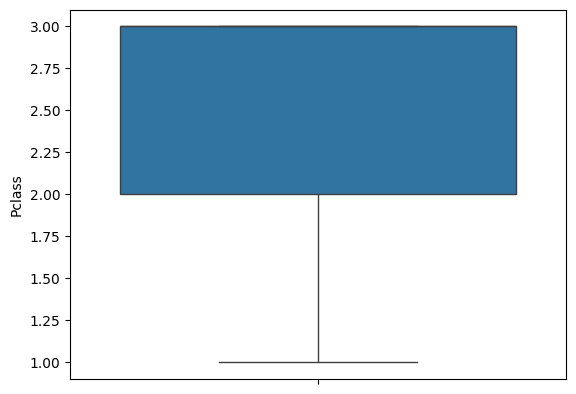

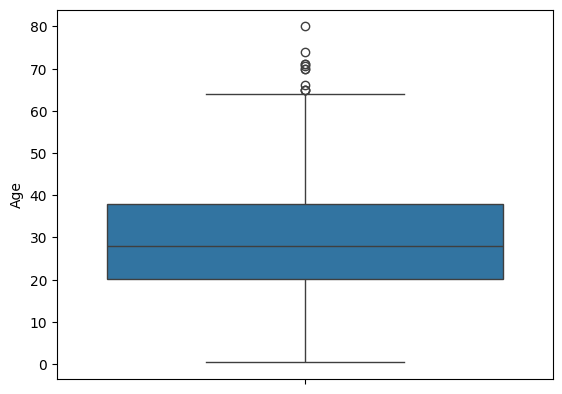

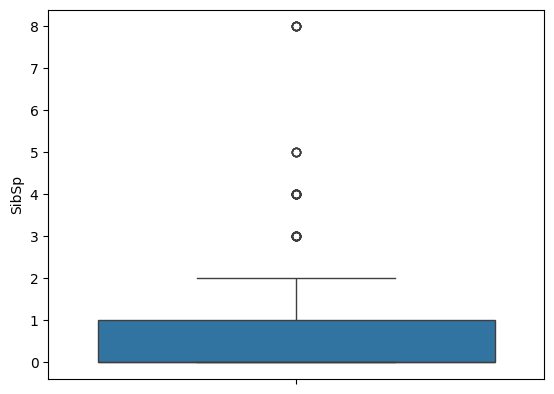

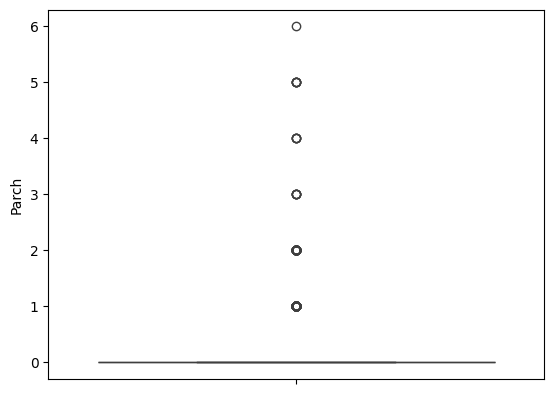

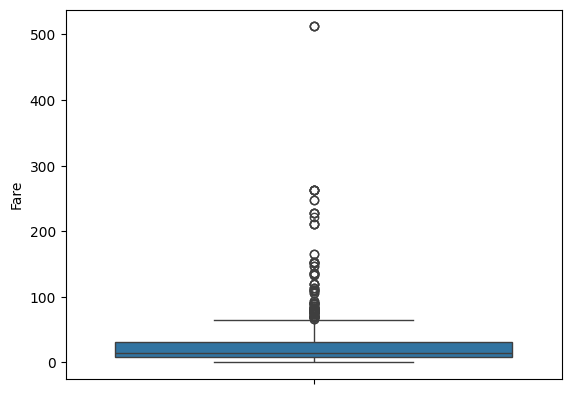

In [284]:
#Plotting boxplots to check outliers
for col in numeric_col.columns:
  sns.boxplot(df[col])
  plt.show()

In [285]:
px.violin(df, y='Fare', box=True, points='all')

In [286]:
# Analyzing relationship between features - bivariate analysis
fig = px.violin(df, x='Sex', y='Age', box=True, points='all')
fig.update_layout(
    autosize=False,
    width=800,
    height=400
)
fig.show()

<Axes: xlabel='Age', ylabel='Fare'>

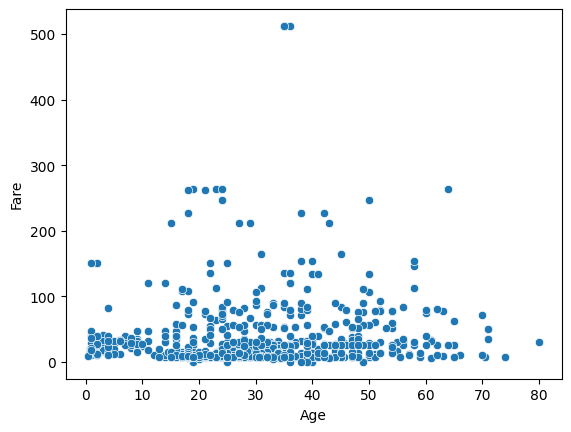

In [287]:
sns.scatterplot(x='Age', y='Fare', data=df)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


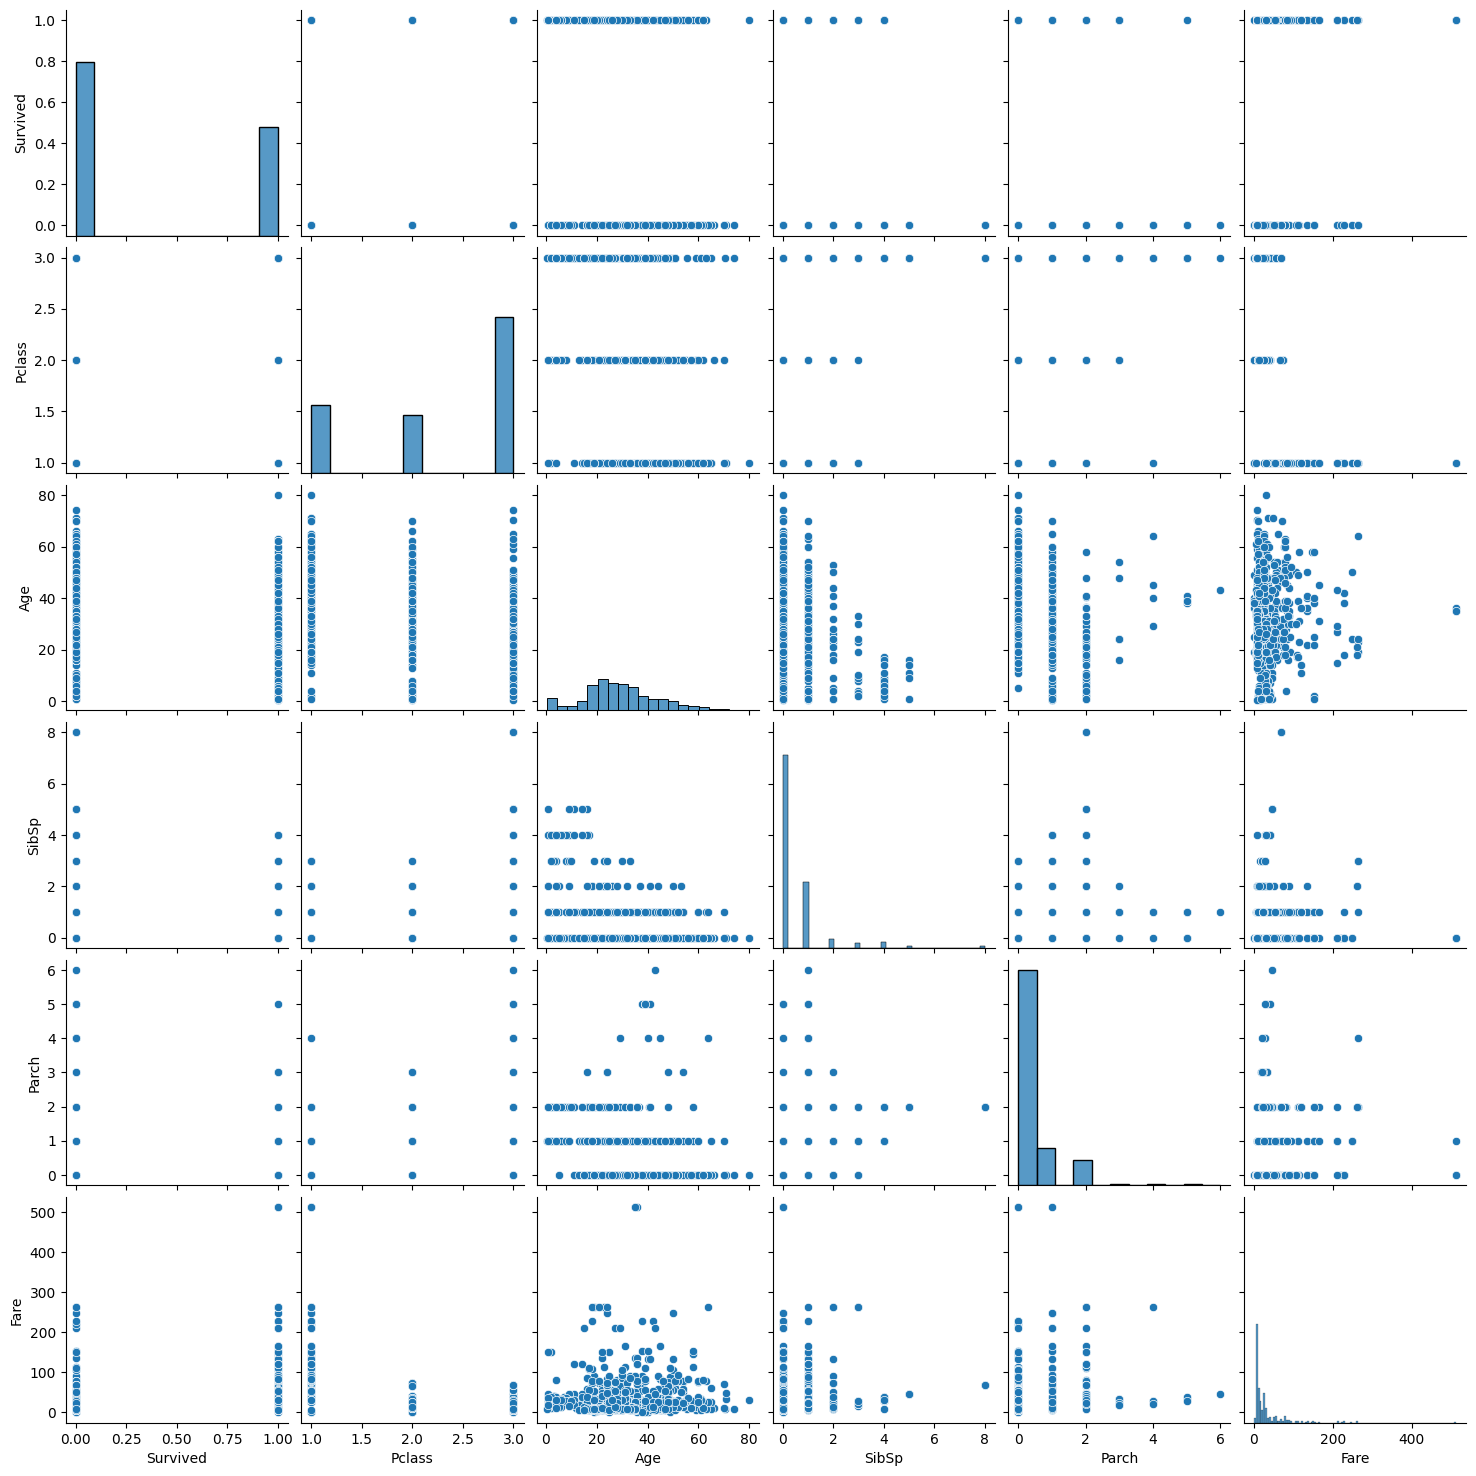

In [289]:
sns.pairplot(numeric_col)

Handling the missing values

In [290]:
#Since in the feature 'Embarked' there are only two missing values, so those can be replaced by mode value.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [291]:
age_skew = df['Age'].skew()
print(f"Skewness of Age: {age_skew}")

Skewness of Age: 0.38910778230082704


In [292]:
#Since distribution of 'Age' is not that skewed we can replace the missing values by mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [293]:
#Since there are a lot of missing values in 'Cabin' so it is prefered to drop this feature
df.drop('Cabin',axis=1,inplace=True)

In [294]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


Handling outliers

In [295]:
#Dropping the the fare value (512)
fare = df['Fare'].sort_values(ascending=False)[0:2]
df.drop(fare.index, inplace=True)

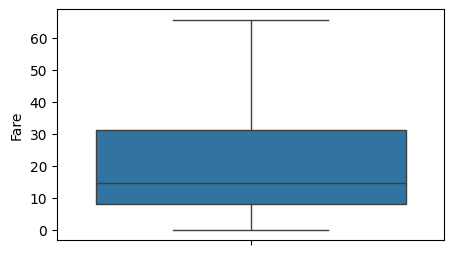

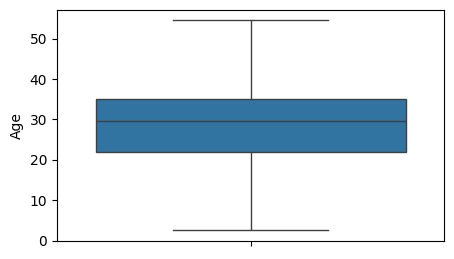

In [296]:
#Using IQR to handle outliers
outlier_cols = ['Fare','Age']
for col in outlier_cols:
  Q1,Q3 = np.percentile(df[col], [25,75])
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  df[col] = np.clip(df[col], lower_bound, upper_bound)
  plt.figure(figsize=(5,3))
  sns.boxplot(df[col])
  plt.show()

In [297]:
len(df['Parch'].unique().tolist())

7

In [298]:
len(df['SibSp'].unique().tolist())

7

In [299]:
len(df['Pclass'].unique().tolist())
#Mainly there were outliers in Fare and Age which were handled above.

3

In [300]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Feature engineering

In [301]:
df = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)

In [302]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,65.6563,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [303]:
df['Sex_male'] = df['Sex_male'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Sex_male    889 non-null    int64  
 7   Embarked_Q  889 non-null    int64  
 8   Embarked_S  889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


Feature Scaling

In [305]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

<Axes: xlabel='Fare', ylabel='Count'>

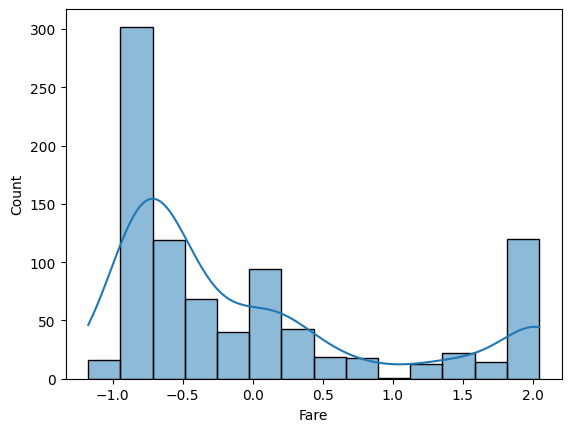

In [306]:
sns.histplot(df['Fare'], kde=True)